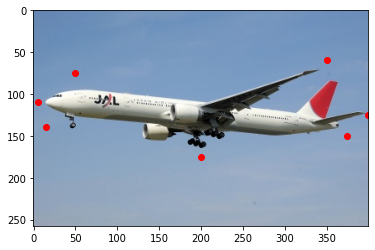

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fname = "images/airplane_src.jpg"

image = cv2.imread(fname)
# ploy curve points
poly = np.array([ [5, 110], [15, 140], [200, 175], [375, 150], [399, 125], [350, 60], [50, 75] ], np.int32)
src_mask = np.zeros(image.shape, image.dtype)
cv2.fillPoly(src_mask, [poly], (255, 255, 255))
im2 = image[:,:,::-1] 	# transform image to rgb
plt.imshow(im2)
plt.scatter(poly[:, 0], poly[:, 1], color='r')
plt.show()

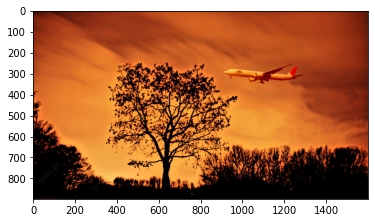

In [8]:
dst = cv2.imread("images/sky.jpeg")
# dst center
center = (1100,300)
output = cv2.seamlessClone(image, dst, src_mask, center, cv2.NORMAL_CLONE)
im2 = output[:,:,::-1] 	# transform image to rgb
plt.imshow(im2)
# plt.scatter([1200], [200], color='r')
plt.show()
#cv2.imwrite("images/opencv-seamless-cloning-example.jpg", output);
